# 正则化

含义：损失函数loss在下降的过程中，要惩罚权重！即防止某些权重值无限制的增大！

例如：原始loss函数为mse
- L1正则化：loss = s1 * abs(w1 + w2 + ...) + mse  很明显，loss下降的过程中，w1、w2、...一系列权重也被惩罚限制了！(s1是个权重)
- L2正则化：loss = s2 * (w1^2 + w2^2 + ...) + mse  道理同上 —— 一般L2效果更好！

权重值s1与s2（属于超参数，需自己试），可以看作是惩罚的力度！

---

keras在Dense层中有一个参数：kernel_regularizer；用来定义该层的“正则化”方式！—— 非常方便！

一般这样使用：1. 从keras中导入regularizers方法，然后选择regularizers.l2(权重值/惩罚力度) 或 regularizers.l1(权重值/惩罚力度)

In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data = pd.read_csv('E:/Python_code/keras_total/日月光华-keras课程资料/小型数据集/credit-a.csv', header = None)

In [3]:
x = data.iloc[:,:-1].values  
y = data.iloc[:, -1].replace(-1,0).values # 因为二分类用sigmoid函数的范围是[0,1]，把-1换成0最好
y = y.reshape(-1,1)   # (-1,1) = (653,1) 

In [4]:
# 3:1 划分：
x_train = x[ :int( len(x)*0.75 ) ]
x_test = x[ int( len(x)*0.75 ): ]
y_train = y[ :int( len(x)*0.75 ) ]
y_test = y[ int( len(x)*0.75 ): ]

# 多层网络搭建

In [5]:
model = keras.Sequential()

In [6]:
from keras import layers
from keras import regularizers  # 正则化模块

In [7]:
# 每一个dense层后加一个dropout层即可；dropout层有个参数：保留多少神经元(0-1)
model.add( layers.Dense(128, input_dim = 15, kernel_regularizer = regularizers.l2(0.005), activation = 'relu' ) )
model.add( layers.Dense(128, kernel_regularizer = regularizers.l2(0.005), activation = 'relu' ) )
model.add( layers.Dense(128, kernel_regularizer = regularizers.l2(0.005), activation = 'relu' ) )
model.add( layers.Dense(1, activation = 'sigmoid') )

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile( optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['acc']
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
history = model.fit( x_train, y_train, epochs = 1000, validation_data=(x_test, y_test) )


Train on 489 samples, validate on 164 samples
Epoch 1/1000
489/489 [==============================] - 1s 1ms/step - loss: 21.8588 - acc: 0.5603 - val_loss: 9.3917 - val_acc: 0.7195
Epoch 2/1000
489/489 [==============================] - 0s 63us/step - loss: 8.3557 - acc: 0.6053 - val_loss: 5.7559 - val_acc: 0.6280
Epoch 3/1000
489/489 [==============================] - 0s 67us/step - loss: 5.3909 - acc: 0.6503 - val_loss: 2.6721 - val_acc: 0.7012
Epoch 4/1000
489/489 [==============================] - 0s 67us/step - loss: 3.6067 - acc: 0.6319 - val_loss: 1.8540 - val_acc: 0.6951
Epoch 5/1000
489/489 [==============================] - 0s 69us/step - loss: 2.1700 - acc: 0.6667 - val_loss: 2.1012 - val_acc: 0.6646
Epoch 6/1000
489/489 [==============================] - 0s 63us/step - loss: 1.9590 - acc: 0.6564 - val_loss: 1.7280 - val_acc: 0.6890
Epoch 7/1000
489/489 [==============================] - 0s 67us/step - loss: 1.6750 - acc: 0.7280 - val_loss: 3.1375 - val_acc: 0.6341
Epoch 8/

489/489 [==============================] - 0s 55us/step - loss: 2.8229 - acc: 0.6810 - val_loss: 1.4167 - val_acc: 0.7439
Epoch 60/1000
489/489 [==============================] - 0s 53us/step - loss: 1.5353 - acc: 0.6912 - val_loss: 1.6771 - val_acc: 0.6951
Epoch 61/1000
489/489 [==============================] - 0s 47us/step - loss: 1.5469 - acc: 0.7628 - val_loss: 1.1292 - val_acc: 0.7500
Epoch 62/1000
489/489 [==============================] - 0s 49us/step - loss: 1.2159 - acc: 0.7771 - val_loss: 1.2544 - val_acc: 0.7439
Epoch 63/1000
489/489 [==============================] - 0s 47us/step - loss: 1.4396 - acc: 0.7526 - val_loss: 1.0992 - val_acc: 0.7683
Epoch 64/1000
489/489 [==============================] - 0s 47us/step - loss: 1.2195 - acc: 0.7730 - val_loss: 1.1065 - val_acc: 0.7561
Epoch 65/1000
489/489 [==============================] - 0s 47us/step - loss: 1.1685 - acc: 0.7832 - val_loss: 1.1577 - val_acc: 0.7439
Epoch 66/1000
489/489 [==============================] - 0s 49

489/489 [==============================] - 0s 47us/step - loss: 2.1631 - acc: 0.7710 - val_loss: 1.1747 - val_acc: 0.7256
Epoch 120/1000
489/489 [==============================] - 0s 51us/step - loss: 1.4374 - acc: 0.7628 - val_loss: 1.4226 - val_acc: 0.7561
Epoch 121/1000
489/489 [==============================] - 0s 47us/step - loss: 1.5983 - acc: 0.7935 - val_loss: 1.0970 - val_acc: 0.7866
Epoch 122/1000
489/489 [==============================] - 0s 45us/step - loss: 1.0874 - acc: 0.7812 - val_loss: 1.2128 - val_acc: 0.7195
Epoch 123/1000
489/489 [==============================] - 0s 51us/step - loss: 1.0235 - acc: 0.7812 - val_loss: 1.0441 - val_acc: 0.7683
Epoch 124/1000
489/489 [==============================] - 0s 47us/step - loss: 0.9495 - acc: 0.7914 - val_loss: 1.0398 - val_acc: 0.7622
Epoch 125/1000
489/489 [==============================] - 0s 49us/step - loss: 0.9464 - acc: 0.7996 - val_loss: 1.0025 - val_acc: 0.8110
Epoch 126/1000
489/489 [==============================] 

Epoch 179/1000
489/489 [==============================] - 0s 49us/step - loss: 1.3033 - acc: 0.7526 - val_loss: 1.2215 - val_acc: 0.6890
Epoch 180/1000
489/489 [==============================] - 0s 49us/step - loss: 0.9788 - acc: 0.7730 - val_loss: 0.9347 - val_acc: 0.7805
Epoch 181/1000
489/489 [==============================] - 0s 47us/step - loss: 0.8969 - acc: 0.8057 - val_loss: 0.9301 - val_acc: 0.7317
Epoch 182/1000
489/489 [==============================] - 0s 51us/step - loss: 0.8756 - acc: 0.8057 - val_loss: 1.2085 - val_acc: 0.7195
Epoch 183/1000
489/489 [==============================] - 0s 45us/step - loss: 1.0167 - acc: 0.7812 - val_loss: 0.9721 - val_acc: 0.7805
Epoch 184/1000
489/489 [==============================] - 0s 51us/step - loss: 0.9259 - acc: 0.7832 - val_loss: 0.9400 - val_acc: 0.7866
Epoch 185/1000
489/489 [==============================] - 0s 45us/step - loss: 0.8930 - acc: 0.8119 - val_loss: 1.0655 - val_acc: 0.7500
Epoch 186/1000
489/489 [=================

Epoch 239/1000
489/489 [==============================] - 0s 51us/step - loss: 0.7956 - acc: 0.8303 - val_loss: 0.9109 - val_acc: 0.7561
Epoch 240/1000
489/489 [==============================] - 0s 45us/step - loss: 0.8006 - acc: 0.8037 - val_loss: 0.9661 - val_acc: 0.7317
Epoch 241/1000
489/489 [==============================] - 0s 49us/step - loss: 0.7980 - acc: 0.8119 - val_loss: 0.9388 - val_acc: 0.7500
Epoch 242/1000
489/489 [==============================] - 0s 45us/step - loss: 0.7754 - acc: 0.8405 - val_loss: 0.8887 - val_acc: 0.7927
Epoch 243/1000
489/489 [==============================] - 0s 49us/step - loss: 0.7579 - acc: 0.8425 - val_loss: 0.9017 - val_acc: 0.7744
Epoch 244/1000
489/489 [==============================] - 0s 47us/step - loss: 0.8143 - acc: 0.8057 - val_loss: 0.9128 - val_acc: 0.7622
Epoch 245/1000
489/489 [==============================] - 0s 47us/step - loss: 0.8306 - acc: 0.7832 - val_loss: 0.9825 - val_acc: 0.7561
Epoch 246/1000
489/489 [=================

Epoch 299/1000
489/489 [==============================] - 0s 49us/step - loss: 0.7113 - acc: 0.8282 - val_loss: 0.8555 - val_acc: 0.8232
Epoch 300/1000
489/489 [==============================] - 0s 49us/step - loss: 0.7030 - acc: 0.8384 - val_loss: 0.8673 - val_acc: 0.8232
Epoch 301/1000
489/489 [==============================] - 0s 49us/step - loss: 0.6812 - acc: 0.8344 - val_loss: 0.9117 - val_acc: 0.6951
Epoch 302/1000
489/489 [==============================] - 0s 47us/step - loss: 0.7226 - acc: 0.8262 - val_loss: 0.9527 - val_acc: 0.7500
Epoch 303/1000
489/489 [==============================] - 0s 51us/step - loss: 0.6858 - acc: 0.8364 - val_loss: 0.9070 - val_acc: 0.7683
Epoch 304/1000
489/489 [==============================] - 0s 47us/step - loss: 0.6772 - acc: 0.8364 - val_loss: 0.8737 - val_acc: 0.7866
Epoch 305/1000
489/489 [==============================] - 0s 51us/step - loss: 0.7255 - acc: 0.8119 - val_loss: 0.8990 - val_acc: 0.7988
Epoch 306/1000
489/489 [=================

Epoch 359/1000
489/489 [==============================] - 0s 47us/step - loss: 0.6105 - acc: 0.8528 - val_loss: 0.9078 - val_acc: 0.7256
Epoch 360/1000
489/489 [==============================] - 0s 49us/step - loss: 0.7396 - acc: 0.8037 - val_loss: 0.8041 - val_acc: 0.8110
Epoch 361/1000
489/489 [==============================] - 0s 51us/step - loss: 0.6747 - acc: 0.8160 - val_loss: 0.8083 - val_acc: 0.7927
Epoch 362/1000
489/489 [==============================] - 0s 51us/step - loss: 0.6491 - acc: 0.8446 - val_loss: 0.7993 - val_acc: 0.7805
Epoch 363/1000
489/489 [==============================] - 0s 47us/step - loss: 0.6329 - acc: 0.8507 - val_loss: 0.8575 - val_acc: 0.7683
Epoch 364/1000
489/489 [==============================] - 0s 51us/step - loss: 0.6318 - acc: 0.8528 - val_loss: 0.8488 - val_acc: 0.7317
Epoch 365/1000
489/489 [==============================] - 0s 53us/step - loss: 0.6348 - acc: 0.8466 - val_loss: 0.8544 - val_acc: 0.7378
Epoch 366/1000
489/489 [=================

Epoch 419/1000
489/489 [==============================] - 0s 51us/step - loss: 0.5737 - acc: 0.8609 - val_loss: 0.8366 - val_acc: 0.8110
Epoch 420/1000
489/489 [==============================] - 0s 51us/step - loss: 0.5436 - acc: 0.8630 - val_loss: 0.8019 - val_acc: 0.8049
Epoch 421/1000
489/489 [==============================] - 0s 51us/step - loss: 0.5185 - acc: 0.8916 - val_loss: 0.9396 - val_acc: 0.7073
Epoch 422/1000
489/489 [==============================] - 0s 45us/step - loss: 0.5312 - acc: 0.8732 - val_loss: 0.9075 - val_acc: 0.7195
Epoch 423/1000
489/489 [==============================] - 0s 45us/step - loss: 0.5637 - acc: 0.8466 - val_loss: 0.8574 - val_acc: 0.7439
Epoch 424/1000
489/489 [==============================] - 0s 47us/step - loss: 0.5920 - acc: 0.8282 - val_loss: 0.7539 - val_acc: 0.8354
Epoch 425/1000
489/489 [==============================] - 0s 47us/step - loss: 0.5698 - acc: 0.8671 - val_loss: 0.8125 - val_acc: 0.7683
Epoch 426/1000
489/489 [=================

Epoch 479/1000
489/489 [==============================] - 0s 49us/step - loss: 0.7267 - acc: 0.8200 - val_loss: 0.8570 - val_acc: 0.7622
Epoch 480/1000
489/489 [==============================] - 0s 47us/step - loss: 0.6156 - acc: 0.8405 - val_loss: 0.8044 - val_acc: 0.8171
Epoch 481/1000
489/489 [==============================] - 0s 47us/step - loss: 0.5560 - acc: 0.8282 - val_loss: 0.7627 - val_acc: 0.7500
Epoch 482/1000
489/489 [==============================] - 0s 47us/step - loss: 0.5642 - acc: 0.8548 - val_loss: 0.7493 - val_acc: 0.7866
Epoch 483/1000
489/489 [==============================] - 0s 49us/step - loss: 0.5420 - acc: 0.8548 - val_loss: 0.7545 - val_acc: 0.7378
Epoch 484/1000
489/489 [==============================] - 0s 47us/step - loss: 0.5177 - acc: 0.8630 - val_loss: 0.7609 - val_acc: 0.7439
Epoch 485/1000
489/489 [==============================] - 0s 51us/step - loss: 0.5219 - acc: 0.8691 - val_loss: 0.7195 - val_acc: 0.7866
Epoch 486/1000
489/489 [=================

Epoch 539/1000
489/489 [==============================] - 0s 47us/step - loss: 0.4881 - acc: 0.8528 - val_loss: 0.7395 - val_acc: 0.7744
Epoch 540/1000
489/489 [==============================] - 0s 49us/step - loss: 0.4684 - acc: 0.8671 - val_loss: 0.7324 - val_acc: 0.8171
Epoch 541/1000
489/489 [==============================] - 0s 47us/step - loss: 0.4921 - acc: 0.8528 - val_loss: 0.7201 - val_acc: 0.7805
Epoch 542/1000
489/489 [==============================] - 0s 49us/step - loss: 0.4676 - acc: 0.8691 - val_loss: 0.7711 - val_acc: 0.7622
Epoch 543/1000
489/489 [==============================] - 0s 47us/step - loss: 0.4669 - acc: 0.8712 - val_loss: 0.7837 - val_acc: 0.7378
Epoch 544/1000
489/489 [==============================] - 0s 47us/step - loss: 0.5134 - acc: 0.8569 - val_loss: 0.7335 - val_acc: 0.8049
Epoch 545/1000
489/489 [==============================] - 0s 47us/step - loss: 0.4833 - acc: 0.8507 - val_loss: 0.8315 - val_acc: 0.6829
Epoch 546/1000
489/489 [=================

Epoch 599/1000
489/489 [==============================] - 0s 49us/step - loss: 0.4255 - acc: 0.8712 - val_loss: 0.6982 - val_acc: 0.7622
Epoch 600/1000
489/489 [==============================] - 0s 47us/step - loss: 0.4227 - acc: 0.8814 - val_loss: 0.7922 - val_acc: 0.7256
Epoch 601/1000
489/489 [==============================] - 0s 49us/step - loss: 0.5128 - acc: 0.8712 - val_loss: 0.7705 - val_acc: 0.6890
Epoch 602/1000
489/489 [==============================] - 0s 47us/step - loss: 0.5281 - acc: 0.8425 - val_loss: 0.7424 - val_acc: 0.7561
Epoch 603/1000
489/489 [==============================] - 0s 45us/step - loss: 0.4775 - acc: 0.8650 - val_loss: 0.7293 - val_acc: 0.7622
Epoch 604/1000
489/489 [==============================] - 0s 51us/step - loss: 0.5327 - acc: 0.8425 - val_loss: 0.7773 - val_acc: 0.7317
Epoch 605/1000
489/489 [==============================] - 0s 45us/step - loss: 0.5233 - acc: 0.8487 - val_loss: 0.7185 - val_acc: 0.7561
Epoch 606/1000
489/489 [=================

Epoch 659/1000
489/489 [==============================] - 0s 51us/step - loss: 0.4322 - acc: 0.8548 - val_loss: 0.7651 - val_acc: 0.6890
Epoch 660/1000
489/489 [==============================] - 0s 49us/step - loss: 0.4094 - acc: 0.8814 - val_loss: 0.7522 - val_acc: 0.7439
Epoch 661/1000
489/489 [==============================] - 0s 45us/step - loss: 0.3882 - acc: 0.8896 - val_loss: 0.7255 - val_acc: 0.7561
Epoch 662/1000
489/489 [==============================] - 0s 49us/step - loss: 0.3739 - acc: 0.8875 - val_loss: 0.8320 - val_acc: 0.7256
Epoch 663/1000
489/489 [==============================] - 0s 47us/step - loss: 0.3675 - acc: 0.8916 - val_loss: 0.7255 - val_acc: 0.7622
Epoch 664/1000
489/489 [==============================] - 0s 47us/step - loss: 0.4012 - acc: 0.8814 - val_loss: 0.7805 - val_acc: 0.7317
Epoch 665/1000
489/489 [==============================] - 0s 45us/step - loss: 0.4337 - acc: 0.8569 - val_loss: 0.7216 - val_acc: 0.7561
Epoch 666/1000
489/489 [=================

Epoch 719/1000
489/489 [==============================] - 0s 49us/step - loss: 0.3687 - acc: 0.8732 - val_loss: 0.8066 - val_acc: 0.7012
Epoch 720/1000
489/489 [==============================] - 0s 53us/step - loss: 0.3840 - acc: 0.8671 - val_loss: 0.7941 - val_acc: 0.7500
Epoch 721/1000
489/489 [==============================] - 0s 49us/step - loss: 0.3814 - acc: 0.8650 - val_loss: 0.8261 - val_acc: 0.6951
Epoch 722/1000
489/489 [==============================] - 0s 45us/step - loss: 0.3603 - acc: 0.8875 - val_loss: 0.7849 - val_acc: 0.7439
Epoch 723/1000
489/489 [==============================] - 0s 45us/step - loss: 0.3688 - acc: 0.8855 - val_loss: 0.8571 - val_acc: 0.6829
Epoch 724/1000
489/489 [==============================] - 0s 47us/step - loss: 0.4330 - acc: 0.8671 - val_loss: 0.7838 - val_acc: 0.6951
Epoch 725/1000
489/489 [==============================] - 0s 47us/step - loss: 0.4539 - acc: 0.8691 - val_loss: 0.8051 - val_acc: 0.6951
Epoch 726/1000
489/489 [=================

Epoch 779/1000
489/489 [==============================] - 0s 51us/step - loss: 0.3311 - acc: 0.9100 - val_loss: 0.8252 - val_acc: 0.7195
Epoch 780/1000
489/489 [==============================] - 0s 47us/step - loss: 0.3754 - acc: 0.8855 - val_loss: 0.7750 - val_acc: 0.7805
Epoch 781/1000
489/489 [==============================] - 0s 47us/step - loss: 0.3470 - acc: 0.8937 - val_loss: 0.8364 - val_acc: 0.7073
Epoch 782/1000
489/489 [==============================] - 0s 45us/step - loss: 0.3408 - acc: 0.9039 - val_loss: 0.7862 - val_acc: 0.7439
Epoch 783/1000
489/489 [==============================] - 0s 49us/step - loss: 0.3507 - acc: 0.8875 - val_loss: 0.7429 - val_acc: 0.7500
Epoch 784/1000
489/489 [==============================] - 0s 45us/step - loss: 0.3248 - acc: 0.9080 - val_loss: 0.7796 - val_acc: 0.7378
Epoch 785/1000
489/489 [==============================] - 0s 47us/step - loss: 0.3155 - acc: 0.8998 - val_loss: 0.7809 - val_acc: 0.7683
Epoch 786/1000
489/489 [=================

Epoch 839/1000
489/489 [==============================] - 0s 45us/step - loss: 0.3802 - acc: 0.8630 - val_loss: 0.7528 - val_acc: 0.7012
Epoch 840/1000
489/489 [==============================] - 0s 45us/step - loss: 0.3290 - acc: 0.8957 - val_loss: 0.7560 - val_acc: 0.7195
Epoch 841/1000
489/489 [==============================] - 0s 47us/step - loss: 0.3055 - acc: 0.9141 - val_loss: 0.7413 - val_acc: 0.7622
Epoch 842/1000
489/489 [==============================] - 0s 45us/step - loss: 0.3184 - acc: 0.9080 - val_loss: 0.8065 - val_acc: 0.7561
Epoch 843/1000
489/489 [==============================] - 0s 47us/step - loss: 0.3118 - acc: 0.9018 - val_loss: 0.7412 - val_acc: 0.7622
Epoch 844/1000
489/489 [==============================] - 0s 47us/step - loss: 0.3033 - acc: 0.9080 - val_loss: 0.8401 - val_acc: 0.7622
Epoch 845/1000
489/489 [==============================] - 0s 47us/step - loss: 0.3430 - acc: 0.8998 - val_loss: 0.8236 - val_acc: 0.7256
Epoch 846/1000
489/489 [=================

Epoch 899/1000
489/489 [==============================] - 0s 49us/step - loss: 0.3021 - acc: 0.9039 - val_loss: 0.8245 - val_acc: 0.7073
Epoch 900/1000
489/489 [==============================] - 0s 45us/step - loss: 0.2802 - acc: 0.9162 - val_loss: 0.8599 - val_acc: 0.7378
Epoch 901/1000
489/489 [==============================] - 0s 49us/step - loss: 0.3185 - acc: 0.9018 - val_loss: 0.6943 - val_acc: 0.7927
Epoch 902/1000
489/489 [==============================] - 0s 47us/step - loss: 0.3012 - acc: 0.9162 - val_loss: 0.7434 - val_acc: 0.7561
Epoch 903/1000
489/489 [==============================] - 0s 47us/step - loss: 0.2949 - acc: 0.9059 - val_loss: 0.8454 - val_acc: 0.7256
Epoch 904/1000
489/489 [==============================] - 0s 49us/step - loss: 0.2894 - acc: 0.9162 - val_loss: 0.9234 - val_acc: 0.7256
Epoch 905/1000
489/489 [==============================] - 0s 47us/step - loss: 0.2794 - acc: 0.9264 - val_loss: 0.8496 - val_acc: 0.7256
Epoch 906/1000
489/489 [=================

Epoch 959/1000
489/489 [==============================] - 0s 51us/step - loss: 0.2939 - acc: 0.9080 - val_loss: 0.7828 - val_acc: 0.7622
Epoch 960/1000
489/489 [==============================] - 0s 47us/step - loss: 0.2711 - acc: 0.9223 - val_loss: 0.7928 - val_acc: 0.7256
Epoch 961/1000
489/489 [==============================] - 0s 49us/step - loss: 0.2761 - acc: 0.9264 - val_loss: 0.9373 - val_acc: 0.7012
Epoch 962/1000
489/489 [==============================] - 0s 49us/step - loss: 0.3292 - acc: 0.8937 - val_loss: 0.9263 - val_acc: 0.6890
Epoch 963/1000
489/489 [==============================] - 0s 51us/step - loss: 0.3006 - acc: 0.9141 - val_loss: 0.7420 - val_acc: 0.7622
Epoch 964/1000
489/489 [==============================] - 0s 51us/step - loss: 0.3041 - acc: 0.9039 - val_loss: 0.8734 - val_acc: 0.6951
Epoch 965/1000
489/489 [==============================] - 0s 49us/step - loss: 0.2969 - acc: 0.9141 - val_loss: 0.7985 - val_acc: 0.7256
Epoch 966/1000
489/489 [=================

In [11]:
# 模型评估：
model.evaluate(x_train, y_train)

489/489 [==============================] - 0s 22us/step


[0.28185592162097156, 0.9202454090118408]

In [12]:
model.evaluate(x_test, y_test)

164/164 [==============================] - 0s 36us/step


[0.755056751937401, 0.7621951103210449]

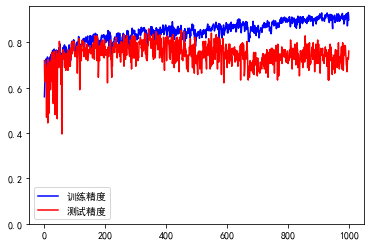

In [13]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False    # 步骤二（解决坐标轴负数的负号显示问题）
# 训练精度与测试精度的对比图：
plt.plot( history.epoch, history.history.get('acc'), c = 'b', label = '训练精度' )
plt.plot( history.epoch, history.history.get('val_acc'), c = 'r', label = '测试精度' )
plt.ylim( ymin=0 )
plt.legend()

# 结果总结

结果貌似不好，这不是说正则化方法不好，而是那个需要人为定义的“惩罚力度超参数”没有定好！

如何选择好的超参数？就是不断的尝试，那个超参数值下model.evaluate(x_test, y_test)的结果最好，就选定那个超参数值！